Done solo by:
Nestor Molina

#Task 1 Code

## Missing Values

### importing libraries
### downloading the datasets

In [ ]:
library(data.table)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [ ]:
german <- setDF(fread('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'))

cancer <- setDF(fread('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data'))

###Adding the attribute names for the columns of the cancer dataset to make easier to understand
###German's attribute names are too long to add

In [ ]:
cancer <- cancer %>% set_names(list('Class', 'Age', 'Menopause', 'Tumor.Size', 'Inv.Nodes', 'Node.Caps', 'Deg.Malig', 'Breast', 'Breast.Quad', 'Irradiat'))
str(cancer)

'data.frame':	286 obs. of  10 variables:
 $ Class      : chr  "no-recurrence-events" "no-recurrence-events" "no-recurrence-events" "no-recurrence-events" ...
 $ Age        : chr  "30-39" "40-49" "40-49" "60-69" ...
 $ Menopause  : chr  "premeno" "premeno" "premeno" "ge40" ...
 $ Tumor.Size : chr  "30-34" "20-24" "20-24" "15-19" ...
 $ Inv.Nodes  : chr  "0-2" "0-2" "0-2" "0-2" ...
 $ Node.Caps  : chr  "no" "no" "no" "no" ...
 $ Deg.Malig  : int  3 2 2 2 2 2 2 1 2 2 ...
 $ Breast     : chr  "left" "right" "left" "right" ...
 $ Breast.Quad: chr  "left_low" "right_up" "left_low" "left_up" ...
 $ Irradiat   : chr  "no" "no" "no" "no" ...


### Removing repeated rows if there are any

In [ ]:
nrow(german)
nrow(german %>% unique())

[1] 1000

[1] 1000

In [ ]:
nrow(cancer)
nrow(cancer %>% unique())
cancer <- cancer %>% unique()

[1] 286

[1] 272

###The Cancer data set has empty values, noted with '?'. The following finds columns with '?' in them. The columns found with '?' values are then manually selected and the values are replaced with the mode of that column

In [ ]:
for(i in 1:ncol(cancer)) {
  values <- cancer[, i] %>% unique()
  
  if (any(values == '?')) {
    print(names(cancer)[i])
    print(values)
  }
}

[1] "Node.Caps"
[1] "no"  "yes" "?"  
[1] "Breast.Quad"
[1] "left_low"  "right_up"  "left_up"   "right_low" "central"   "?"        


In [ ]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

cancer$Node.Caps[cancer$Node.Caps=='?']<- getmode(cancer$Node.Caps)
cancer$Breast.Quad[cancer$Breast.Quad=='?'] <- getmode(cancer$Breast.Quad)

## Normalization

### Column 21 is converted to a factor since it is more of a category than a continous numerical value
### Columns that correspond to T/F are converted to Logical types

In [ ]:
german$V19 <- gsub('A191', 'FALSE', german$V19)
german$V19 <- gsub('A192', 'TRUE', german$V19)
german$V19 <- as.logical(german$V19)

german$V20 <- gsub('A201', 'TRUE', german$V20)
german$V20 <- gsub('A202', 'FALSE', german$V20)
german$V20 <- as.logical(german$V20)

In [ ]:
german$V21 = as.factor(german$V21)

In [ ]:
str(german)

'data.frame':	1000 obs. of  21 variables:
 $ V1 : chr  "A11" "A12" "A14" "A11" ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : chr  "A34" "A32" "A34" "A32" ...
 $ V4 : chr  "A43" "A43" "A46" "A42" ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : chr  "A65" "A61" "A61" "A61" ...
 $ V7 : chr  "A75" "A73" "A74" "A74" ...
 $ V8 : int  4 2 2 2 3 2 3 2 2 4 ...
 $ V9 : chr  "A93" "A92" "A93" "A93" ...
 $ V10: chr  "A101" "A101" "A101" "A103" ...
 $ V11: int  4 2 3 4 4 4 4 2 4 2 ...
 $ V12: chr  "A121" "A121" "A121" "A122" ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V14: chr  "A143" "A143" "A143" "A143" ...
 $ V15: chr  "A152" "A152" "A152" "A153" ...
 $ V16: int  2 1 1 1 2 1 1 1 1 2 ...
 $ V17: chr  "A173" "A173" "A172" "A173" ...
 $ V18: int  1 1 2 2 2 2 1 1 1 1 ...
 $ V19: logi  TRUE FALSE FALSE FALSE FALSE TRUE ...
 $ V20: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ V21: Factor w/ 2 levels "1","2": 1 2 1 1 2 1 1 1 1 2 ...


### Each column that has a type of 'integer' is then normalized using the Z-Score standardization method

In [ ]:
types <- sapply(german, class)

for(i in 1:ncol(german)) {
  if (types[i] == 'integer') {
    german[[i]]  <- (german[[i]] - mean(german[[i]])) / sd(german[[i]])
  }
  if (types[i] == 'character') {
    s <- paste('A', i, sep='')
    german[[i]] <- gsub(s , '', german[[i]])
  }
}

german <- as.data.frame(unclass(german), stringsAsFactors = TRUE)

In [ ]:
str(german)

'data.frame':	1000 obs. of  21 variables:
 $ V1 : Factor w/ 4 levels "1","2","3","4": 1 2 4 1 1 4 4 2 4 2 ...
 $ V2 : num  -1.236 2.247 -0.738 1.75 0.257 ...
 $ V3 : Factor w/ 5 levels "0","1","2","3",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ V4 : Factor w/ 10 levels "0","1","10","2",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : num  -0.745 0.949 -0.416 1.633 0.566 ...
 $ V6 : Factor w/ 5 levels "1","2","3","4",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ V7 : Factor w/ 5 levels "1","2","3","4",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ V8 : num  0.918 -0.8697 -0.8697 -0.8697 0.0241 ...
 $ V9 : Factor w/ 4 levels "1","2","3","4": 3 2 3 3 3 3 3 3 1 4 ...
 $ V10: Factor w/ 3 levels "1","2","3": 1 1 1 3 1 1 1 1 1 1 ...
 $ V11: num  1.046 -0.766 0.14 1.046 1.046 ...
 $ V12: Factor w/ 4 levels "1","2","3","4": 1 1 1 2 4 4 2 3 1 3 ...
 $ V13: num  2.765 -1.191 1.183 0.831 1.534 ...
 $ V14: Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 3 levels "1","2","3": 2 2 2 3 3 3 2 1 2 2 ...
 $ V16: num  1.027 -0.705 -0.7

### The cancer dataset does not contain any pure numerical values (other than Deg.Malig) so normalization isn't necessary.

### Deg.Malig is of a numerical type but it's more of a category than a continuous value so I convert it to a factor

In [ ]:
str(cancer)

'data.frame':	272 obs. of  10 variables:
 $ Class      : chr  "no-recurrence-events" "no-recurrence-events" "no-recurrence-events" "no-recurrence-events" ...
 $ Age        : chr  "30-39" "40-49" "40-49" "60-69" ...
 $ Menopause  : chr  "premeno" "premeno" "premeno" "ge40" ...
 $ Tumor.Size : chr  "30-34" "20-24" "20-24" "15-19" ...
 $ Inv.Nodes  : chr  "0-2" "0-2" "0-2" "0-2" ...
 $ Node.Caps  : chr  "no" "no" "no" "no" ...
 $ Deg.Malig  : int  3 2 2 2 2 2 2 1 2 2 ...
 $ Breast     : chr  "left" "right" "left" "right" ...
 $ Breast.Quad: chr  "left_low" "right_up" "left_low" "left_up" ...
 $ Irradiat   : chr  "no" "no" "no" "no" ...


In [ ]:
cancer$Node.Caps <- gsub('no', 'FALSE', cancer$Node.Caps)
cancer$Node.Caps <- gsub('yes', 'TRUE', cancer$Node.Caps)
cancer$Node.Caps <- as.logical(cancer$Node.Caps)

cancer$Irradiat <- gsub('no', 'FALSE', cancer$Irradiat)
cancer$Irradiat <- gsub('yes', 'TRUE', cancer$Irradiat)
cancer$Irradiat <- as.logical(cancer$Irradiat)

In [ ]:
cancer$Deg.Malig = as.factor(cancer$Deg.Malig)
cancer <- as.data.frame(unclass(cancer), stringsAsFactors = TRUE)
str(cancer)

'data.frame':	272 obs. of  10 variables:
 $ Class      : Factor w/ 2 levels "no-recurrence-events",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Age        : Factor w/ 6 levels "20-29","30-39",..: 2 3 3 5 3 5 4 5 3 3 ...
 $ Menopause  : Factor w/ 3 levels "ge40","lt40",..: 3 3 3 1 3 1 3 1 3 3 ...
 $ Tumor.Size : Factor w/ 11 levels "0-4","10-14",..: 6 4 4 3 1 3 5 4 11 4 ...
 $ Inv.Nodes  : Factor w/ 7 levels "0-2","12-14",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Node.Caps  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Deg.Malig  : Factor w/ 3 levels "1","2","3": 3 2 2 2 2 2 2 1 2 2 ...
 $ Breast     : Factor w/ 2 levels "left","right": 1 2 1 2 2 1 1 1 1 2 ...
 $ Breast.Quad: Factor w/ 5 levels "central","left_low",..: 2 5 2 3 4 2 2 2 2 3 ...
 $ Irradiat   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


## Feature Selection

### To do feature selection, the data is split into training and testing sets

In [ ]:
if (!require(caret)) install.packages('caret')
library(caret)

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
set.seed(1111)
trainIndex <- createDataPartition(y = german$V21, p=0.7, list=FALSE)

german_train <- german[trainIndex,]
german_test <- german[-trainIndex,]

nrow(german_train)
nrow(german_test)

[1] 700

[1] 300

In [ ]:
trainIndex <- createDataPartition(y = cancer$Class, p=0.7, list=FALSE)

cancer_train <- cancer[trainIndex,]
cancer_test <- cancer[-trainIndex,]

nrow(cancer_train)
nrow(cancer_test)

[1] 191

[1] 81

### Now that the datasets are split into train/test sets we can do feature selection

In [ ]:
if (!require('FSelector')) install.packages('FSelector')
library(FSelector)

Loading required package: FSelector

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘FSelector’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘entropy’, ‘randomForest’, ‘RWeka’




In [ ]:
results <- german_train %>% cfs(V21 ~ ., data = .)
(g_formula <- as.simple.formula(results, 'V21'))

#(results <- german_train %>% chi.squared(V21 ~ ., data = .) %>% arrange(desc(attr_importance)))

V21 ~ V1 + V2 + V3 + V5 + V6
<environment: 0x560267c46eb0>

In [ ]:
results <- cancer_train %>% cfs(Class ~ ., data = .)
(c_formula <- as.simple.formula(results, 'Class'))

#(results <- cancer_train %>% chi.squared(Class ~ ., data = .) %>% arrange(desc(attr_importance)))

Class ~ Tumor.Size + Inv.Nodes + Node.Caps + Deg.Malig + Irradiat
<environment: 0x56027053f188>

#Task 2 code



### CART

In [ ]:
if (!require(rpart)) install.packages('rpart')
library(rpart)

if (!require(rpart.plot)) install.packages('rpart.plot')
library(rpart.plot)

Loading required package: rpart

Loading required package: rpart.plot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rpart.plot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(2121)

(german_dt_fit <- train(g_formula, data = german_train, method = 'rpart', 
                      parms = list(split = 'information'), 
                      control = rpart.control(minsplit = 7), 
                      trControl = trainControl(method = 'repeatedcv', number = 70, repeats = 5),
                      tuneLength = 30))

CART 

700 samples
  5 predictor
  2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (70 fold, repeated 5 times) 
Summary of sample sizes: 690, 690, 690, 690, 690, 690, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa        
  0.000000000  0.6868571   0.2298934408
  0.001724138  0.6957143   0.2417490674
  0.003448276  0.7137143   0.2771239958
  0.005172414  0.7257143   0.2860257162
  0.006896552  0.7228571   0.2633839544
  0.008620690  0.7274286   0.2619695560
  0.010344828  0.7162857   0.2282102627
  0.012068966  0.7177143   0.2272618965
  0.013793103  0.7165714   0.2168456215
  0.015517241  0.6931429   0.1509957283
  0.017241379  0.6897143   0.1349478775
  0.018965517  0.6877143   0.1276897432
  0.020689655  0.6880000   0.1121485116
  0.022413793  0.6948571   0.1192830890
  0.024137931  0.6982857   0.1240176144
  0.025862069  0.7014286   0.1234153085
  0.027586207  0.6942857   0.0937174064
  0.029310345  0.6837143   0.0473586194
  

In [ ]:
(gcp <- german_dt_fit$bestTune$cp)

[1] 0.00862069

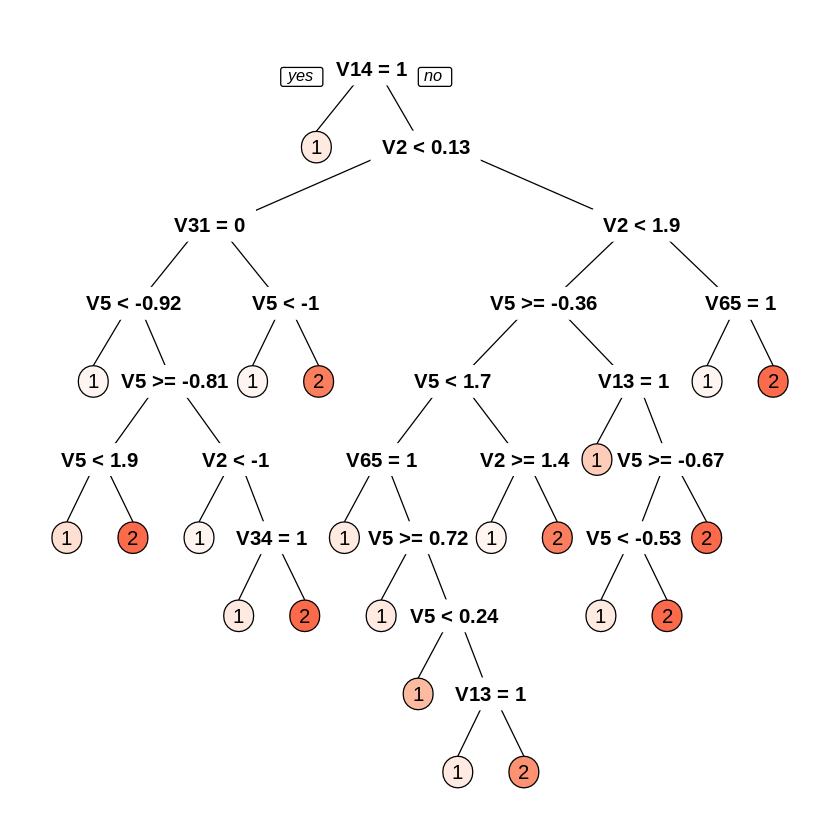

In [ ]:
prp(german_dt_fit$finalModel, box.palette = 'Reds', tweak = 1.2)

In [ ]:
german_dt_fit$finalModel

n= 700 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 700 210 1 (0.70000000 0.30000000)  
    2) V14>=0.5 269  33 1 (0.87732342 0.12267658) *
    3) V14< 0.5 431 177 1 (0.58932715 0.41067285)  
      6) V2< 0.1324342 247  79 1 (0.68016194 0.31983806)  
       12) V31< 0.5 232  68 1 (0.70689655 0.29310345)  
         24) V5< -0.9215375 14   0 1 (1.00000000 0.00000000) *
         25) V5>=-0.9215375 218  68 1 (0.68807339 0.31192661)  
           50) V5>=-0.8118922 193  52 1 (0.73056995 0.26943005)  
            100) V5< 1.931899 190  49 1 (0.74210526 0.25789474) *
            101) V5>=1.931899 3   0 2 (0.00000000 1.00000000) *
           51) V5< -0.8118922 25   9 2 (0.36000000 0.64000000)  
            102) V2< -1.028542 4   0 1 (1.00000000 0.00000000) *
            103) V2>=-1.028542 21   5 2 (0.23809524 0.76190476)  
              206) V34>=0.5 4   1 1 (0.75000000 0.25000000) *
              207) V34< 0.5 17   2 2 (0.11764706 0.88235294) *
       13) V31

In [ ]:
set.seed(2121)
(cancer_dtree_fit <- train(c_formula, data = cancer_train, method = 'rpart',
                          parms = list(split = 'information'),
                          control = rpart.control(minsplit = 7),
                          trControl = trainControl(method = 'repeatedcv', number = 19, repeats = 5),
                          tuneLength = 30))

CART 

191 samples
  5 predictor
  2 classes: 'no-recurrence-events', 'recurrence-events' 

No pre-processing
Resampling: Cross-Validated (19 fold, repeated 5 times) 
Summary of sample sizes: 181, 181, 181, 181, 181, 181, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa       
  0.000000000  0.6663158   0.111309192
  0.002419843  0.6663158   0.111309192
  0.004839685  0.6632536   0.098511647
  0.007259528  0.6590431   0.082062933
  0.009679371  0.6808612   0.111518397
  0.012099214  0.6829665   0.115085667
  0.014519056  0.7017225   0.147276902
  0.016938899  0.7027751   0.147110582
  0.019358742  0.7414354   0.241879163
  0.021778584  0.7414354   0.241879163
  0.024198427  0.7414354   0.241879163
  0.026618270  0.7414354   0.241879163
  0.029038113  0.7403828   0.234286956
  0.031457955  0.7257416   0.175711725
  0.033877798  0.7257416   0.175711725
  0.036297641  0.7257416   0.175711725
  0.038717483  0.7024880   0.075046817
  0.041137326  0.7024880 

In [ ]:
(ccp <- cancer_dtree_fit$bestTune$cp)

[1] 0.02661827

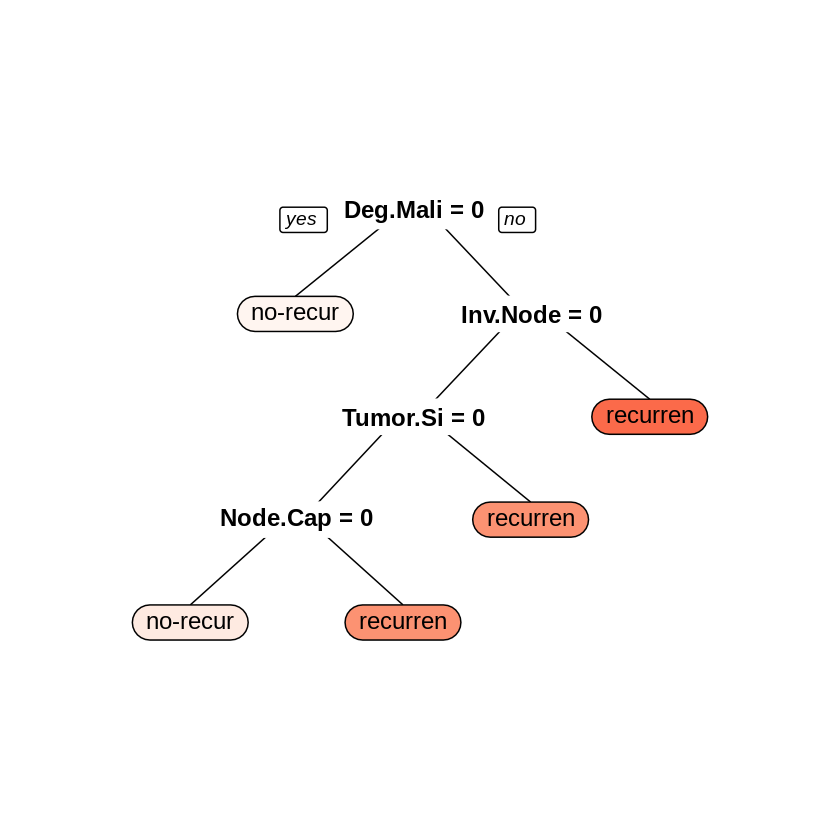

In [ ]:
prp(cancer_dtree_fit$finalModel, box.palette = 'Reds', tweak = 1.2)

In [ ]:
cancer_dtree_fit$finalModel

n= 191 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 191 57 no-recurrence-events (0.7015707 0.2984293)  
   2) Deg.Malig3< 0.5 142 32 no-recurrence-events (0.7746479 0.2253521) *
   3) Deg.Malig3>=0.5 49 24 recurrence-events (0.4897959 0.5102041)  
     6) Inv.Nodes6-8< 0.5 43 19 no-recurrence-events (0.5581395 0.4418605)  
      12) Tumor.Size25-29< 0.5 34 13 no-recurrence-events (0.6176471 0.3823529)  
        24) Node.CapsTRUE< 0.5 25  7 no-recurrence-events (0.7200000 0.2800000) *
        25) Node.CapsTRUE>=0.5 9  3 recurrence-events (0.3333333 0.6666667) *
      13) Tumor.Size25-29>=0.5 9  3 recurrence-events (0.3333333 0.6666667) *
     7) Inv.Nodes6-8>=0.5 6  0 recurrence-events (0.0000000 1.0000000) *

### PART

In [ ]:
if (!require(RWeka)) install.packages('RWeka')
library(RWeka)

Loading required package: RWeka



In [ ]:
set.seed(2121)

(g_rulesFit <- train(g_formula, 
                    method = "PART", 
                    data = german_train,
                    tuneLength = 10, 
                    trControl = trainControl(method = "cv", number = 70)))

Rule-Based Classifier 

700 samples
  5 predictor
  2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (70 fold) 
Summary of sample sizes: 690, 690, 690, 690, 690, 690, ... 
Resampling results across tuning parameters:

  threshold   pruned  Accuracy   Kappa    
  0.01000000  yes     0.7314286  0.3034067
  0.01000000  no      0.7257143  0.2893249
  0.06444444  yes     0.7357143  0.3142077
  0.06444444  no      0.7257143  0.2893249
  0.11888889  yes     0.7357143  0.3122533
  0.11888889  no      0.7257143  0.2893249
  0.17333333  yes     0.7385714  0.3386976
  0.17333333  no      0.7257143  0.2893249
  0.22777778  yes     0.7414286  0.3455460
  0.22777778  no      0.7257143  0.2893249
  0.28222222  yes     0.7414286  0.3509541
  0.28222222  no      0.7257143  0.2893249
  0.33666667  yes     0.7414286  0.3476125
  0.33666667  no      0.7257143  0.2893249
  0.39111111  yes     0.7414286  0.3476125
  0.39111111  no      0.7257143  0.2893249
  0.44555556  yes     0.7400000 

In [ ]:
gpruned <- g_rulesFit$bestTune$pruned
gthresh <- g_rulesFit$bestTune$threshold

g_rulesFit$finalModel

PART decision list
------------------

V14 > 0 AND
V34 > 0: 1 (106.0/8.0)

V14 > 0 AND
V62 <= 0 AND
V32 > 0 AND
V65 <= 0 AND
V63 <= 0 AND
V2 <= 0.256825: 1 (58.0/8.0)

V14 > 0 AND
V31 <= 0 AND
V65 > 0: 1 (38.0/3.0)

V63 > 0 AND
V13 <= 0 AND
V14 > 0: 1 (22.0/3.0)

V64 > 0: 1 (24.0/4.0)

V31 <= 0 AND
V2 <= -0.489517 AND
V14 <= 0 AND
V34 > 0 AND
V12 <= 0 AND
V5 <= -0.364985: 1 (22.0/1.0)

V14 > 0 AND
V62 <= 0 AND
V32 <= 0: 1 (21.0/6.0)

V14 > 0 AND
V62 > 0: 1 (16.0/1.0)

V2 > 1.749509 AND
V65 <= 0 AND
V14 <= 0 AND
V62 <= 0: 2 (20.0/1.0)

V31 > 0 AND
V12 <= 0: 2 (17.0/5.0)

V13 > 0 AND
V32 > 0: 1 (23.0/3.0)

V65 > 0 AND
V33 <= 0 AND
V12 > 0 AND
V32 > 0 AND
V5 <= 2.513427: 1 (20.0/3.0)

V12 > 0 AND
V65 > 0 AND
V32 <= 0: 1 (12.0)

V2 <= 0.090971 AND
V12 > 0 AND
V62 <= 0 AND
V34 > 0 AND
V2 <= -0.406591: 1 (8.0)

V12 > 0 AND
V31 <= 0 AND
V2 <= 0.090971 AND
V62 <= 0 AND
V34 <= 0: 1 (48.0/12.0)

V34 > 0 AND
V62 <= 0 AND
V65 <= 0 AND
V12 > 0 AND
V5 > -0.711103 AND
V2 <= 0.505605: 1 (7.0)

V65 <= 

In [ ]:
set.seed(2121)

(c_rulesFit <- train(c_formula, 
                    method = "PART", 
                    data = cancer_train,
                    tuneLength = 10, 
                    trControl = trainControl(method = "cv", number = 19)))

Rule-Based Classifier 

191 samples
  5 predictor
  2 classes: 'no-recurrence-events', 'recurrence-events' 

No pre-processing
Resampling: Cross-Validated (19 fold) 
Summary of sample sizes: 181, 181, 181, 181, 181, 181, ... 
Resampling results across tuning parameters:

  threshold   pruned  Accuracy   Kappa    
  0.01000000  yes     0.6961722  0.1270082
  0.01000000  no      0.7057416  0.1721239
  0.06444444  yes     0.7014354  0.1075246
  0.06444444  no      0.7057416  0.1721239
  0.11888889  yes     0.7119617  0.1450021
  0.11888889  no      0.7057416  0.1721239
  0.17333333  yes     0.7224880  0.1837833
  0.17333333  no      0.7057416  0.1721239
  0.22777778  yes     0.6956938  0.1308379
  0.22777778  no      0.7057416  0.1721239
  0.28222222  yes     0.6904306  0.1569304
  0.28222222  no      0.7057416  0.1721239
  0.33666667  yes     0.6904306  0.1569304
  0.33666667  no      0.7057416  0.1721239
  0.39111111  yes     0.6904306  0.1569304
  0.39111111  no      0.7057416  0.17212

In [ ]:
cpruned <- c_rulesFit$bestTune$pruned
cthresh <- c_rulesFit$bestTune$threshold

c_rulesFit$finalModel

PART decision list
------------------

Tumor.Size10-14 <= 0 AND
Deg.Malig3 <= 0 AND
Tumor.Size25-29 <= 0 AND
Inv.Nodes9-11 <= 0: no-recurrence-events (94.0/26.0)

Inv.Nodes6-8 <= 0 AND
Tumor.Size10-14 <= 0 AND
Deg.Malig3 <= 0 AND
Tumor.Size25-29 > 0: no-recurrence-events (26.0/3.0)

Tumor.Size10-14 > 0: no-recurrence-events (16.0)

Inv.Nodes6-8 <= 0 AND
Tumor.Size25-29 <= 0 AND
Node.CapsTRUE <= 0 AND
Deg.Malig3 > 0 AND
Tumor.Size40-44 <= 0 AND
Tumor.Size15-19 <= 0 AND
Inv.Nodes9-11 <= 0 AND
IrradiatTRUE <= 0: no-recurrence-events (14.0/4.0)

Inv.Nodes6-8 > 0: recurrence-events (7.0/1.0)

Tumor.Size40-44 <= 0 AND
Tumor.Size35-39 > 0 AND
IrradiatTRUE > 0: no-recurrence-events (4.0)

Deg.Malig3 > 0 AND
Tumor.Size35-39 <= 0 AND
Tumor.Size40-44 <= 0: recurrence-events (21.0/9.0)

Tumor.Size40-44 <= 0: recurrence-events (5.0)

: no-recurrence-events (4.0/1.0)

Number of Rules  : 	9


#Task 3 code


In [ ]:
german_acc <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(german_acc) <- c('CART', 'PART')
cancer_acc <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(cancer_acc) <- c('CART', 'PART')

g_cart <- NULL
c_cart <- NULL
g_part <- NULL
c_part <- NULL

set.seed(1010)
for (i in 1:100) {
  # Split each dataset
  trainIndex <- createDataPartition(y = german$V21, p=0.7, list=FALSE)
  if (i == 1) g_train <- german[trainIndex,]
  g_test <- german[-trainIndex,]

  trainIndex <- createDataPartition(y = cancer$Class, p=0.7, list=FALSE)
  if (i == 1) c_train <- cancer[trainIndex,]
  c_test <- cancer[-trainIndex,]

  # Fit models on initial run
  if (i == 1) {
    g_cart <- rpart(formula = g_formula, data = g_train, control = rpart.control(cp=gcp, minsplit=7), parms = list(split = 'information'))
    c_cart <- rpart(formula = c_formula, data = c_train, control = rpart.control(cp=ccp, minsplit=7), parms = list(split = 'information'))

    g_part <- PART(g_formula, data = g_train, control = Weka_control(prune=gpruned, thresholder=gthresh))
    c_part <- PART(c_formula, data = c_train, control = Weka_control(prune=cpruned, thresholder=cthresh))
  }

  # Get predictions for all 4 models
  g_cart_pred <- predict(g_cart, newdata = g_test, type='class')
  c_cart_pred <- predict(c_cart, newdata = c_test, type='class')

  g_part_pred <- predict(g_part, newdata = g_test, type='class')
  c_part_pred <- predict(c_part, newdata = c_test, type='class')

  # Statistics
  gc_acc <- confusionMatrix(g_cart_pred, g_test$V21)$overall[1]
  cc_acc <- confusionMatrix(c_cart_pred, c_test$Class)$overall[1]

  gp_acc <- confusionMatrix(g_part_pred, g_test$V21)$overall[1]
  cp_acc <- confusionMatrix(c_part_pred, c_test$Class)$overall[1]

  # Record Accuracies
  german_acc[i, ] <- c(gc_acc, gp_acc)
  cancer_acc[i, ] <- c(cc_acc, cp_acc)
}

In [ ]:
# F Test
FTest_G <- (var(german_acc[1]) / var(german_acc[2]))[1]
FTest_C <- (var(cancer_acc[1]) / var(cancer_acc[2]))[1]

cat('Variance across CART/PART for German dataset:', FTest_G, '\n')
cat('Variance across CART/PART for Cancer dataset:', FTest_C)

Variance across CART/PART for German dataset: 0.7255058 
Variance across CART/PART for Cancer dataset: 1.475855

#Task 4 code

In [ ]:
# Initialize the models

trainIndex <- createDataPartition(y = german$V21, p=0.7, list=FALSE)
g_train <- german[trainIndex,]

#trainIndex <- createDataPartition(y = cancer$Class, p=0.7, list=FALSE)
#c_train <- cancer[trainIndex,]

g_cart <- rpart(formula = g_formula, data = g_train, control = rpart.control(cp=gcp, minsplit=7), parms = list(split = 'information'))
#c_cart <- rpart(formula = c_formula, data = c_train, control = rpart.control(cp=ccp, minsplit=7), parms = list(split = 'information'))

g_part <- PART(g_formula, data = g_train, control = Weka_control(prune=gpruned, thresholder=gthresh))
#c_part <- PART(c_formula, data = c_train, control = Weka_control(prune=cpruned, thresholder=cthresh))

for (i in 1:3) {
  german_acc <- data.frame(matrix(ncol = 2, nrow = 0))
  colnames(german_acc) <- c('CART', 'PART')
  #cancer_acc <- data.frame(matrix(ncol = 2, nrow = 0))
  #colnames(cancer_acc) <- c('CART', 'PART')

  level <- i * .10

  for (j in 1:100) {
    # Split each dataset
    testIndex <- createDataPartition(y = german$V21, p=0.3, list=FALSE)
    g_test <- german[testIndex,]

    #testIndex <- createDataPartition(y = cancer$Class, p=0.3, list=FALSE)
    #c_test <- cancer[testIndex,]

    # Find mean
    g_mean <- mean(german$V2)
    #c_mean <- NULL

    # Create altered data 
    g_alt <- g_test
    g_alt %>% mutate(V2 == ifelse(V2 <= g_mean, V2 + level * V2, V2 - level * V2))

    # Predict using altered data 
    # Get predictions for all 4 models
    g_cart_pred <- predict(g_cart, newdata = g_alt, type='class')
    #c_cart_pred <- predict(c_cart, newdata = c_test, type='class')

    g_part_pred <- predict(g_part, newdata = g_alt, type='class')
    #c_part_pred <- predict(c_part, newdata = c_test, type='class')

    # Statistics
    gc_acc <- confusionMatrix(g_cart_pred, g_alt$V21)$overall[1]
    #cc_acc <- confusionMatrix(c_cart_pred, c_test$Class)$overall[1]

    gp_acc <- confusionMatrix(g_part_pred, g_alt$V21)$overall[1]
    #cp_acc <- confusionMatrix(c_part_pred, c_test$Class)$overall[1]

    # Record Accuracies
    german_acc[j, ] <- c(gc_acc, gp_acc)
    #cancer_acc[j, ] <- c(cc_acc, cp_acc)
  }

  # F Test
  FTest_G <- (var(german_acc[1]) / var(german_acc[2]))[1]
  #FTest_C <- (var(cancer_acc[1]) / var(cancer_acc[2]))[1]

  cat('Run:', i, 'Level:', level, '\n')
  cat('Variance across CART/PART for German dataset:', FTest_G, '\n')
  #cat('Variance across CART/PART for Cancer dataset:', FTest_C, '\n\n')
}

Run: 1 Level: 0.1 
Variance across CART/PART for German dataset: 0.9764516 
Variance across CART/PART for Cancer dataset: 1.272196 

Run: 2 Level: 0.2 
Variance across CART/PART for German dataset: 0.9484919 
Variance across CART/PART for Cancer dataset: 0.9831831 

Run: 3 Level: 0.3 
Variance across CART/PART for German dataset: 0.7382131 
Variance across CART/PART for Cancer dataset: 1.181806 

